In [927]:
import pandas as pd
import numpy as np

# Plotting
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

In [928]:
df = pd.read_csv(
    filepath_or_buffer="Math-Students.csv"
)

- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'athome' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g., administrative or police), 'at home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - 4 hours)
- studytime - weekly study time (numeric: 1 - 10 hours)
- failures - number of past class failures (numeric: n if 1 or more)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)

These grades are related to the course subject, Math:
- G1 - first period grade (numeric: from 0 to 20)
- G2 - second-period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

### 🧠 SECTION 1 — Data Understanding and Cleaning

In [929]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399 entries, 0 to 398
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      399 non-null    object
 1   sex         399 non-null    object
 2   age         399 non-null    int64 
 3   address     399 non-null    object
 4   famsize     399 non-null    object
 5   Pstatus     399 non-null    object
 6   Medu        399 non-null    int64 
 7   Fedu        399 non-null    int64 
 8   Mjob        399 non-null    object
 9   Fjob        399 non-null    object
 10  reason      399 non-null    object
 11  guardian    399 non-null    object
 12  traveltime  399 non-null    int64 
 13  studytime   399 non-null    int64 
 14  failures    399 non-null    int64 
 15  schoolsup   399 non-null    object
 16  famsup      399 non-null    object
 17  paid        399 non-null    object
 18  activities  399 non-null    object
 19  nursery     399 non-null    object
 20  higher    

In [930]:
for column in df.columns:
    number_na = df[column].isnull().sum()
    if number_na > 1:
        print(f"Pay attentin to {column} column.\n \
              It has {number_na} missing values")

In [931]:
# Show min and max for numeric columns
df_range_num = (
    df
    .select_dtypes(include="number")
    .agg(["min", "max"])
)

print("Min-Max Range for Numeric Columns:")
print(df_range_num)

Min-Max Range for Numeric Columns:
     age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  \
min   15     0     0           1          1         0       1         1   
max   22     4     4           4          4         3       5         5   

     goout  Dalc  Walc  health  absences  G1  G2  G3  
min      1     1     1       1         0   3   0   0  
max      5     5     5       5        75  19  19  20  


In [932]:
data_dictonary_summary = dict()

for column in df.columns:
    number_of_unique = len(df[column].unique())
    column_type = df.dtypes[column]
    example_values = df.loc[:5, column].to_list()

    data_dictonary_summary[column] = [
        number_of_unique,
        column_type,
        example_values
    ]

In [933]:
pd.DataFrame(data_dictonary_summary).melt()

,variable,value
0,school,2
1,school,object
2,school,"[GP, GP, GP, GP, GP, GP]"
3,sex,2
4,sex,object
...,...,...
94,G2,int64
95,G2,"[6, 5, 8, 14, 10, 15]"
96,G3,18
97,G3,int64


In [934]:
df["avg_period_grade"] = (df["G1"] + df["G2"]) / 2

In [935]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_period_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,5.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,7.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,14.5
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,2,3,3,3,5,5,8,9,9,8.5
395,MS,M,18,U,GT3,T,4,4,teacher,services,...,3,2,1,2,4,0,8,7,7,7.5
396,MS,M,17,U,GT3,T,4,4,teacher,services,...,3,2,1,2,4,0,8,7,7,7.5
397,MS,M,19,U,GT3,T,4,4,teacher,other,...,3,2,1,2,4,0,8,7,7,7.5


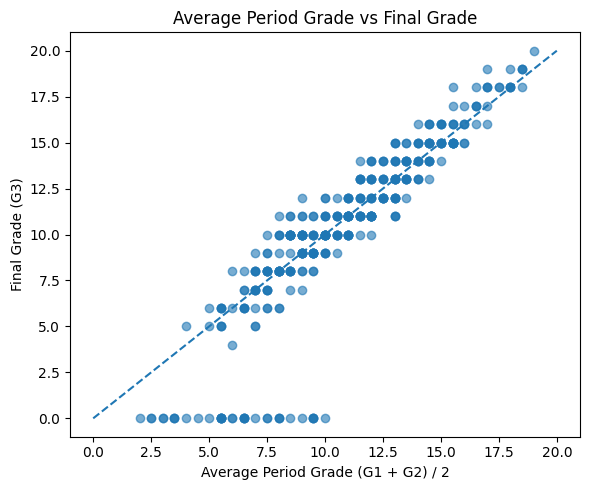

In [936]:
plt.figure(figsize=(6, 5))
plt.scatter(df["avg_period_grade"], df["G3"], alpha=0.6)
plt.plot([0, 20], [0, 20], linestyle="--")
plt.xlabel("Average Period Grade (G1 + G2) / 2")
plt.ylabel("Final Grade (G3)")
plt.title("Average Period Grade vs Final Grade")
plt.tight_layout()
plt.show()

### 📊 SECTION 2 — Target Variable Exploration

In [937]:
df.loc[:, ["G1", "G2", "G3"]]

,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10
...,...,...,...
394,8,9,9
395,8,7,7
396,8,7,7
397,8,7,7


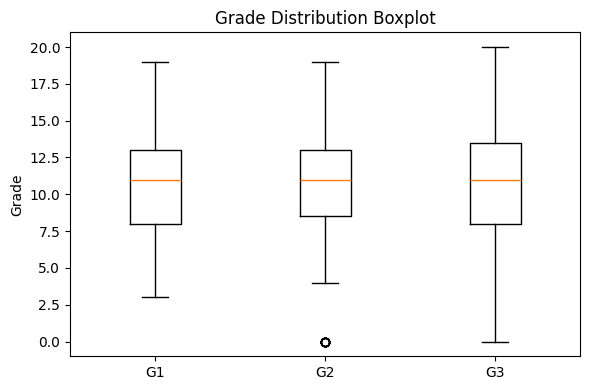

In [938]:
plt.figure(figsize=(6, 4))

plt.boxplot(
    [df["G1"], df["G2"], df["G3"]],
    tick_labels=["G1", "G2", "G3"]
)

plt.ylabel("Grade")
plt.title("Grade Distribution Boxplot")
plt.tight_layout()
plt.show()


In [939]:
school_mapper = {
    'GP': 'Gabriel Pereira',
    'MS': 'Mousinho da Silveira'
}

df["school"] = df["school"].replace(school_mapper)

In [940]:
stats = (
    df
    .groupby(by="school")
    .agg(
        mean=("G3", "mean"),
        median=("G3", "median"),
        std=("G3", "std")
    )
)

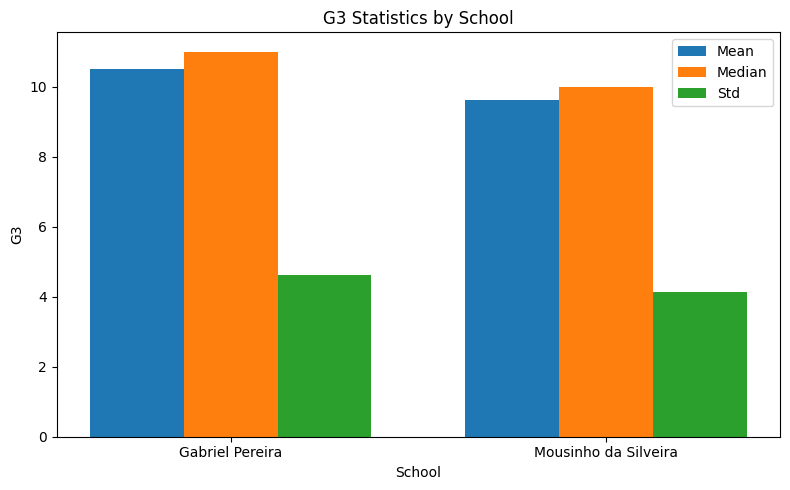

In [941]:
x = np.arange(len(stats.index))
width = 0.25

plt.figure(figsize=(8, 5))

plt.bar(x - width, stats["mean"], width, label="Mean")
plt.bar(x,         stats["median"], width, label="Median")
plt.bar(x + width, stats["std"], width, label="Std")

plt.xticks(x, stats.index)
plt.xlabel("School")
plt.ylabel("G3")
plt.title("G3 Statistics by School")
plt.legend()
plt.tight_layout()
plt.show()


In [942]:
sex_mapper = {
    'F': 'Female',
    'M': 'Male'
}

df["sex"] = df["sex"].replace(sex_mapper)

<Figure size 500x400 with 0 Axes>

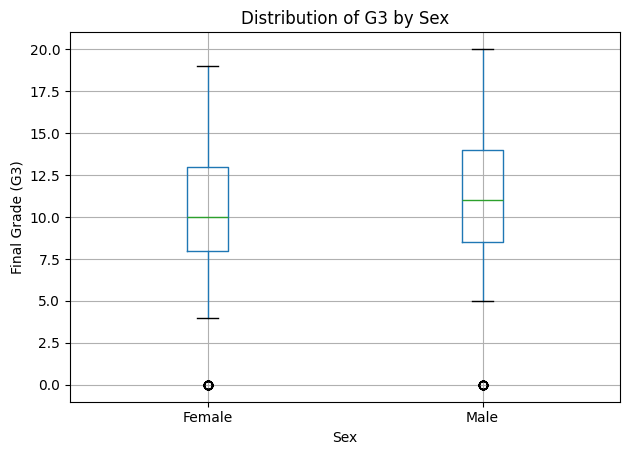

In [943]:
plt.figure(figsize=(5, 4))

df.boxplot(
    column="G3",
    by="sex"
)

plt.xlabel("Sex")
plt.ylabel("Final Grade (G3)")
plt.title("Distribution of G3 by Sex")
plt.suptitle("")  # remove automatic pandas title
plt.tight_layout()
plt.show()

In [944]:
stats = (
    df
    .groupby(by="school")
    .agg(
        number_of_students=("school", "count"), 
        female_students=("sex", lambda sex: (sex == "Female").sum()),
        male_students=("sex", lambda sex: (sex == "Male").sum())

    )
)

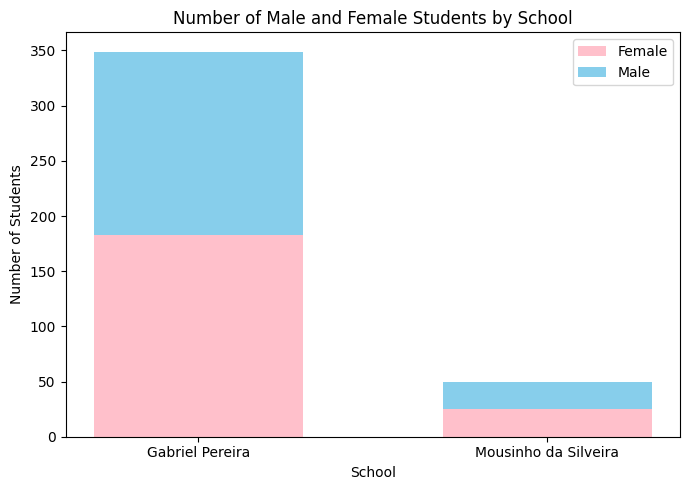

In [945]:
x = np.arange(len(stats.index))  # positions
width = 0.6

plt.figure(figsize=(7, 5))

plt.bar(x, stats["female_students"], width, label="Female", color="pink")
plt.bar(x, stats["male_students"], width, bottom=stats["female_students"], label="Male", color="skyblue")

plt.xticks(x, stats.index)
plt.xlabel("School")
plt.ylabel("Number of Students")
plt.title("Number of Male and Female Students by School")
plt.legend()
plt.tight_layout()
plt.show()


In [946]:
# Lets assume that we have some passing criteria "score"
min_score = 10

def pass_or_not(score):
    return 1 if score >= min_score else 0 

df["pass_flag"] = df["G3"].apply(func=pass_or_not)

In [947]:
pass_rate = df[df["pass_flag"] == 1]["pass_flag"].sum() / len(df)
pass_rate

np.float64(0.6641604010025063)

### 🔍 SECTION 3 — GroupBy & Aggregation

#### Why Did They Choose this University?

In [948]:
df["reason"].value_counts()

reason
course        147
home          109
reputation    107
other          36
Name: count, dtype: int64

In [949]:
(
    df
    .groupby(by="school")
    .agg(
        course=("reason", lambda reason: (reason == "course").sum()), 
        home=("reason", lambda reason: (reason == "home").sum()),
        reputation=("reason", lambda reason: (reason == "reputation").sum()), 
        other=("reason", lambda reason: (reason == "other").sum())
    )
)

,course,home,reputation,other
school,,,,
Gabriel Pereira,124,98,100,27
Mousinho da Silveira,23,11,7,9


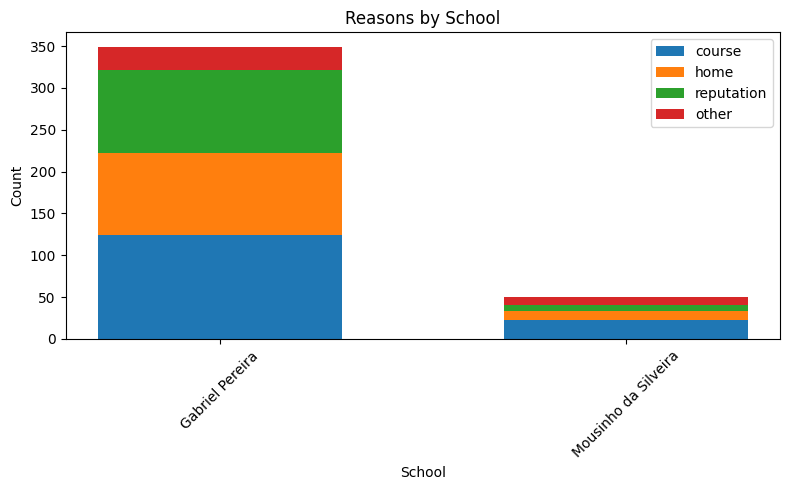

In [950]:
df_grouped = (
    df
    .groupby("school")
    .agg(
        course=("reason", lambda reason: (reason == "course").sum()), 
        home=("reason", lambda reason: (reason == "home").sum()),
        reputation=("reason", lambda reason: (reason == "reputation").sum()), 
        other=("reason", lambda reason: (reason == "other").sum())
    )
    .reset_index()
)

x = np.arange(len(df_grouped["school"]))
width = 0.6

plt.figure(figsize=(8, 5))

plt.bar(x, df_grouped["course"], width, label="course")
plt.bar(x, df_grouped["home"], width, bottom=df_grouped["course"], label="home")
plt.bar(
    x,
    df_grouped["reputation"],
    width,
    bottom=df_grouped["course"] + df_grouped["home"],
    label="reputation"
)
plt.bar(
    x,
    df_grouped["other"],
    width,
    bottom=df_grouped["course"] + df_grouped["home"] + df_grouped["reputation"],
    label="other"
)

plt.xticks(x, df_grouped["school"], rotation=45)
plt.xlabel("School")
plt.ylabel("Count")
plt.title("Reasons by School")
plt.legend()
plt.tight_layout()
plt.show()

#### Mean G3 and Sample Size by Study Time

In [951]:
df["studytime"].value_counts()

studytime
2    202
1    105
3     65
4     27
Name: count, dtype: int64

In [952]:
stats = (
    df
    .groupby(by="studytime")
    .agg(
        mean_g3=("G3", "mean"),
        no_of_students=("studytime", "count")
    )

    .reset_index()
)

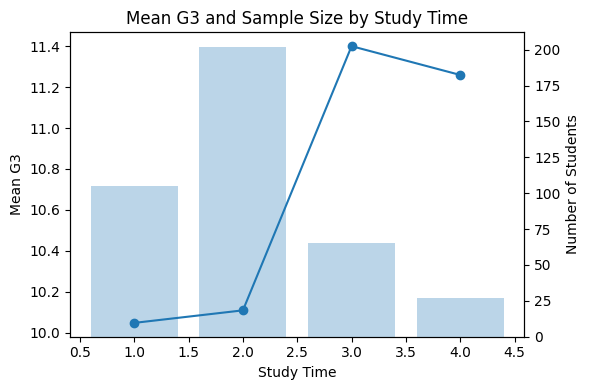

In [953]:
fig, ax1 = plt.subplots(figsize=(6, 4))

ax1.plot(stats["studytime"], stats["mean_g3"], marker="o")
ax1.set_xlabel("Study Time")
ax1.set_ylabel("Mean G3")

ax2 = ax1.twinx()
ax2.bar(stats["studytime"], stats["no_of_students"], alpha=0.3)
ax2.set_ylabel("Number of Students")

plt.title("Mean G3 and Sample Size by Study Time")
plt.tight_layout()
plt.show()


#### Mean G3 by Number of Failures

In [954]:
df["failures"].value_counts()

failures
0    316
1     50
2     17
3     16
Name: count, dtype: int64

In [955]:
(
    df
    .groupby(by="failures")
    .agg(
        mean_g3=("G3", "mean")
    )
)

,mean_g3
failures,
0,11.199367
1,8.120000
2,6.235294
3,5.687500


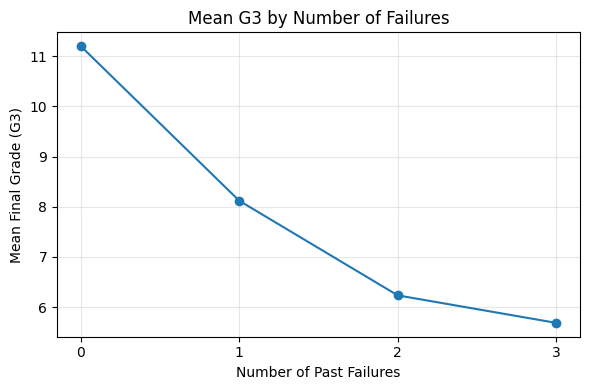

In [956]:
stats = (
    df
    .groupby("failures")
    .agg(mean_g3=("G3", "mean"))
    .reset_index()
)

plt.figure(figsize=(6, 4))

plt.plot(
    stats["failures"],
    stats["mean_g3"],
    marker="o"
)

plt.xlabel("Number of Past Failures")
plt.ylabel("Mean Final Grade (G3)")
plt.title("Mean G3 by Number of Failures")
plt.xticks(stats["failures"])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### Mean G3 by Sex and School

In [957]:
(
    df
    .groupby(by=["sex", "school"])
    .agg(mean_g3=("G3", "mean"))
    .reset_index()
)

,sex,school,mean_g3
0,Female,Gabriel Pereira,9.972678
1,Female,Mousinho da Silveira,9.920000
2,Male,Gabriel Pereira,11.060241
3,Male,Mousinho da Silveira,9.320000


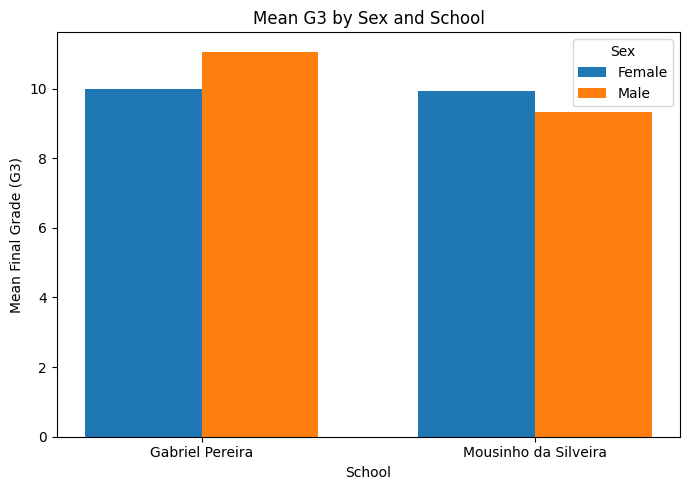

In [958]:
stats = (
    df
    .groupby(["sex", "school"])
    .agg(mean_g3=("G3", "mean"))
    .reset_index()
)

pivot = stats.pivot(index="school", columns="sex", values="mean_g3")

x = np.arange(len(pivot.index))
width = 0.35

plt.figure(figsize=(7, 5))

for i, sex in enumerate(pivot.columns):
    plt.bar(
        x + i * width,
        pivot[sex],
        width,
        label=sex
    )

plt.xticks(x + width / 2, pivot.index)
plt.xlabel("School")
plt.ylabel("Mean Final Grade (G3)")
plt.title("Mean G3 by Sex and School")
plt.legend(title="Sex")
plt.tight_layout()
plt.show()


#### Mean G3 by Internet Access

In [959]:
(
    df
    .groupby(by="internet")
    .agg(mean_g3=("G3", "mean"))
)

,mean_g3
internet,
no,9.271429
yes,10.617021


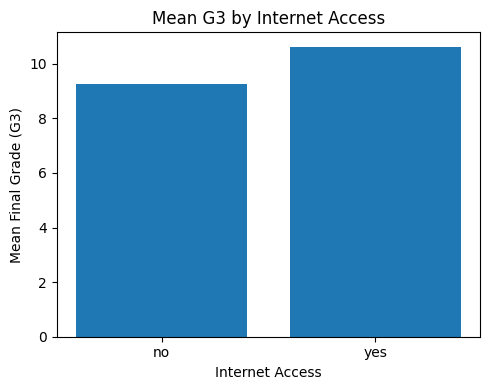

In [960]:
stats = (
    df
    .groupby("internet")
    .agg(mean_g3=("G3", "mean"))
    .reset_index()
)

plt.figure(figsize=(5, 4))

plt.bar(
    stats["internet"],
    stats["mean_g3"]
)

plt.xlabel("Internet Access")
plt.ylabel("Mean Final Grade (G3)")
plt.title("Mean G3 by Internet Access")
plt.tight_layout()
plt.show()


### 📈 SECTION 4 — Behavioral & Lifestyle Factors

#### Mean G3 vs Alcohol Consumption

In [961]:
stats_walc = (
    df
    .groupby("Walc")
    .agg(mean_g3=("G3", "mean"))
    .reset_index()
)

In [962]:
stats_dalc = (
    df
    .groupby("Dalc")
    .agg(mean_g3=("G3", "mean"))
    .reset_index()
)

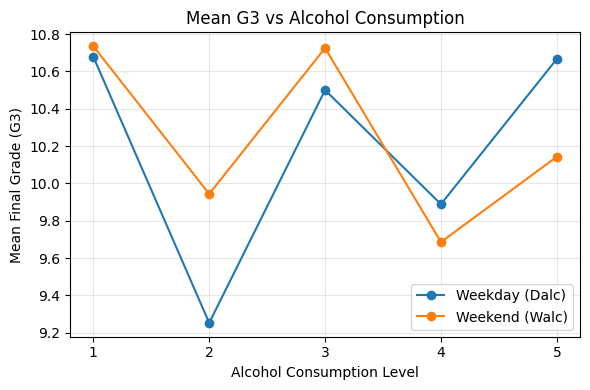

In [963]:
plt.figure(figsize=(6, 4))

plt.plot(stats_dalc["Dalc"], stats_dalc["mean_g3"], marker="o", label="Weekday (Dalc)")
plt.plot(stats_walc["Walc"], stats_walc["mean_g3"], marker="o", label="Weekend (Walc)")

plt.xlabel("Alcohol Consumption Level")
plt.ylabel("Mean Final Grade (G3)")
plt.title("Mean G3 vs Alcohol Consumption")
plt.xticks(sorted(set(stats_dalc["Dalc"]) | set(stats_walc["Walc"])))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


From this graph, one can make conclusion that the more you drink, the higher your score. HAH!

#### Mean G3 by Absences Quantile

In [964]:
df["absences_q"] = pd.qcut(
    df["absences"],
    q=5,
    duplicates="drop",
    labels=["low", "medium", "high", "very high"]
)

In [965]:
df["absences_q"].value_counts()

absences_q
low          187
high          85
very high     66
medium        61
Name: count, dtype: int64

In [966]:
(
    df
    .groupby(by="absences_q", observed=True)
    .agg(mean_g3=("G3", "mean"))
)

,mean_g3
absences_q,
low,9.689840
medium,11.311475
high,11.411765
very high,10.151515


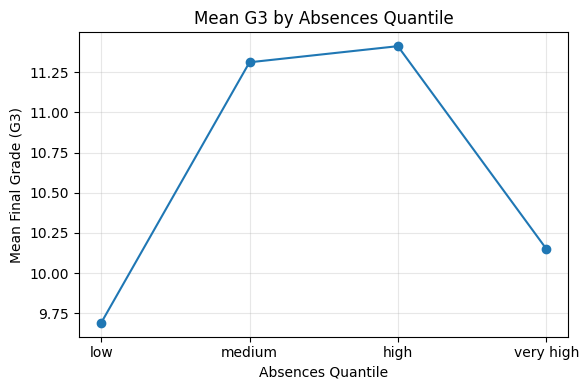

In [967]:
stats = (
    df
    .groupby("absences_q", observed=True)
    .agg(mean_g3=("G3", "mean"))
    .reset_index()
)

plt.figure(figsize=(6, 4))
plt.plot(
    stats["absences_q"],
    stats["mean_g3"],
    marker="o"
)
plt.xlabel("Absences Quantile")
plt.ylabel("Mean Final Grade (G3)")
plt.title("Mean G3 by Absences Quantile")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### Free time & Socializing

In [968]:
df["freetime"].value_counts()

freetime
3    161
4    115
2     64
5     40
1     19
Name: count, dtype: int64

In [969]:
df["goout"].value_counts()

goout
3    130
2    107
4     86
5     53
1     23
Name: count, dtype: int64

In [970]:
stats_freetime = (
    df
    .groupby(by="freetime")
    .agg(mean_g3=("G3", "mean"))
    .reset_index()
)

stats_goout = (
    df
    .groupby(by="goout")
    .agg(mean_g3=("G3", "mean"))
    .reset_index()
)

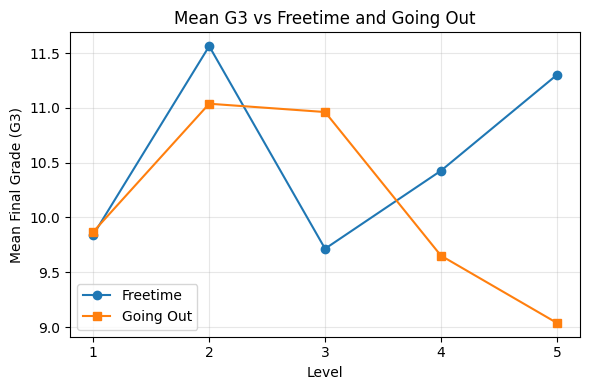

In [971]:
plt.figure(figsize=(6, 4))

plt.plot(stats_freetime["freetime"], stats_freetime["mean_g3"], marker="o", label="Freetime")
plt.plot(stats_goout["goout"], stats_goout["mean_g3"], marker="s", label="Going Out")

plt.xlabel("Level")
plt.ylabel("Mean Final Grade (G3)")
plt.title("Mean G3 vs Freetime and Going Out")
plt.xticks(sorted(set(stats_freetime["freetime"]) | set(stats_goout["goout"])))
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


#### Romantics

In [972]:
stats_romantic = (
    df
    .groupby(by="romantic")
    .agg(
        mean_g3=("G3", "mean"),
        passed=("pass_flag", lambda pass_flag: (pass_flag == 1).sum()),
        not_passed=("pass_flag", lambda pass_flag: (pass_flag == 0).sum())
    )
    .reset_index()
)

stats_romantic

,romantic,mean_g3,passed,not_passed
0,no,10.779026,185,82
1,yes,9.575758,80,52


In [973]:
# For romantic = yes group
pass_rate_yes = (
    df.loc[df["romantic"] == "yes", "pass_flag"].sum() / 
    df["romantic"].value_counts()["yes"]
)

# For romantic = no group
pass_rate_no = (
    df.loc[df["romantic"] == "no", "pass_flag"].sum() / 
    df["romantic"].value_counts()["no"]
)

In [974]:
pass_rate_yes

np.float64(0.6060606060606061)

In [975]:
pass_rate_no

np.float64(0.6928838951310862)

### 🧪 SECTION 5 — Feature Relationships & Insight Extraction

In [976]:
df = df.drop(labels=["avg_period_grade", "pass_flag"], axis="columns")

#### Correlation Analysis for Numeric Values

In [977]:
numeric_columns = (
    df
    .select_dtypes(include="number")
    .drop(labels=["G2", "G1"], axis="columns")
)
numeric_columns

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,19,1,1,1,1,0,3,2,3,3,3,5,5,9
395,18,4,4,1,2,0,5,3,2,1,2,4,0,7
396,17,4,4,1,2,0,5,3,2,1,2,4,0,7
397,19,4,4,1,2,0,5,3,2,1,2,4,0,7


In [978]:
cm = numeric_columns.corr(
    method="pearson")

In [979]:
cm

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
age,1.000000,-0.149923,-0.147121,0.063481,-0.004543,0.237200,0.065134,0.013916,0.115375,0.124551,0.114151,-0.058469,0.166349,-0.167627
Medu,-0.149923,1.000000,0.629096,-0.177485,0.064040,-0.240025,0.009476,0.027994,0.052057,0.013525,-0.049383,-0.042895,0.091263,0.206658
Fedu,-0.147121,0.629096,1.000000,-0.165097,-0.009662,-0.253940,0.014472,-0.015913,0.029089,-0.004935,-0.015570,0.018933,0.014560,0.140584
traveltime,0.063481,-0.177485,-0.165097,1.000000,-0.100427,0.094847,-0.024192,-0.015467,0.034726,0.141312,0.135260,0.005417,-0.008300,-0.111785
studytime,-0.004543,0.064040,-0.009662,-0.100427,1.000000,-0.173195,0.038960,-0.143057,-0.063166,-0.195502,-0.253621,-0.075712,-0.062238,0.097862
failures,0.237200,-0.240025,-0.253940,0.094847,-0.173195,1.000000,-0.049262,0.092932,0.128291,0.138143,0.142801,0.064281,0.066709,-0.355695
famrel,0.065134,0.009476,0.014472,-0.024192,0.038960,-0.049262,1.000000,0.146852,0.052159,-0.083283,-0.115242,0.097123,-0.052298,0.042132
freetime,0.013916,0.027994,-0.015913,-0.015467,-0.143057,0.092932,0.146852,1.000000,0.285876,0.209914,0.148278,0.074915,-0.056229,0.013033
goout,0.115375,0.052057,0.029089,0.034726,-0.063166,0.128291,0.052159,0.285876,1.000000,0.270655,0.420449,-0.012716,0.051058,-0.124362
Dalc,0.124551,0.013525,-0.004935,0.141312,-0.195502,0.138143,-0.083283,0.209914,0.270655,1.000000,0.647656,0.075291,0.115316,-0.050400


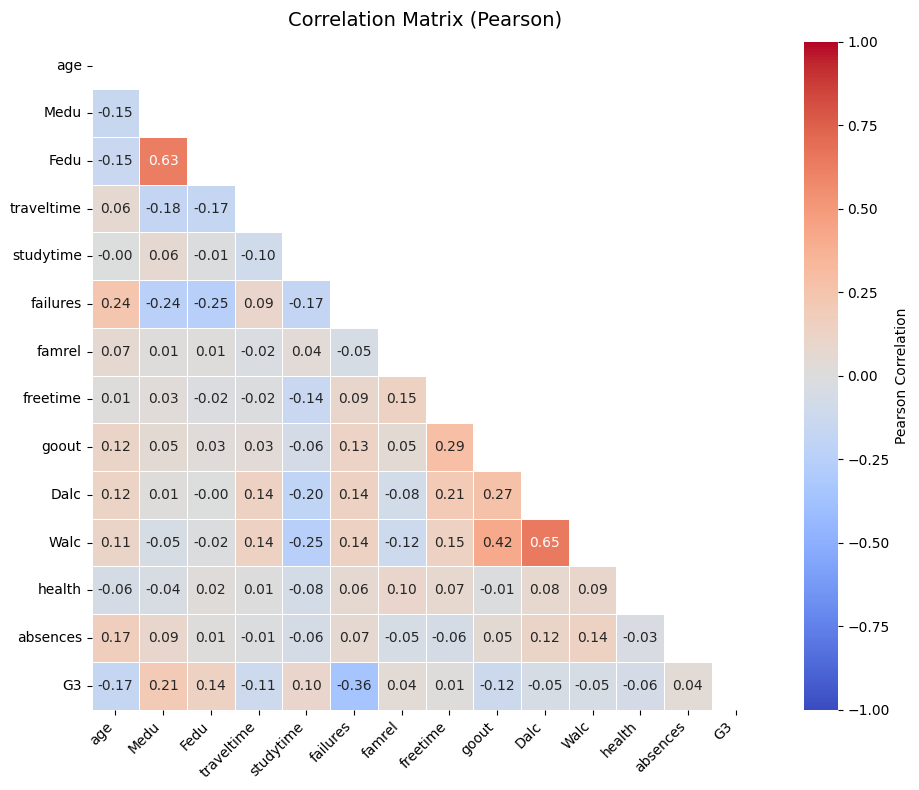

In [980]:
plt.figure(figsize=(10, 8))

mask = np.triu(np.ones_like(cm, dtype=bool))  # hide upper triangle

sns.heatmap(
    cm,
    mask=mask,
    cmap="coolwarm",
    vmin=-1,
    vmax=1,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"label": "Pearson Correlation"},
    square=True
)

plt.title("Correlation Matrix (Pearson)", fontsize=14, pad=12)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


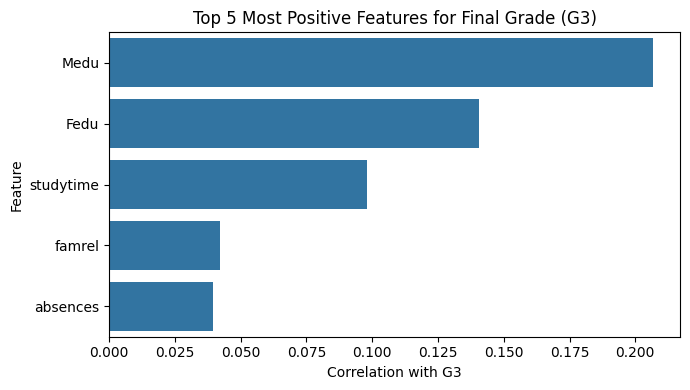

In [981]:
top5 = (
    cm["G3"]
    .drop("G3")
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(7, 4))

sns.barplot(
    x=top5.values,
    y=top5.index,
    orient="h"
)

plt.xlabel("Correlation with G3")
plt.ylabel("Feature")
plt.title("Top 5 Most Positive Features for Final Grade (G3)")
plt.tight_layout()
plt.show()

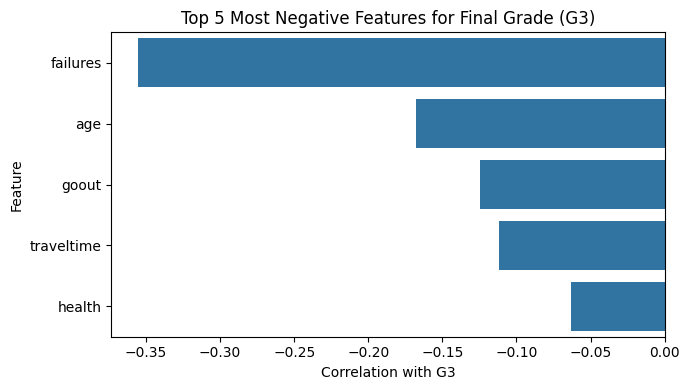

In [982]:
top5 = (
    cm["G3"]
    .drop("G3")
    .sort_values(ascending=True)
    .head(5)
)

plt.figure(figsize=(7, 4))

sns.barplot(
    x=top5.values,
    y=top5.index,
    orient="h"
)

plt.xlabel("Correlation with G3")
plt.ylabel("Feature")
plt.title("Top 5 Most Negative Features for Final Grade (G3)")
plt.tight_layout()
plt.show()

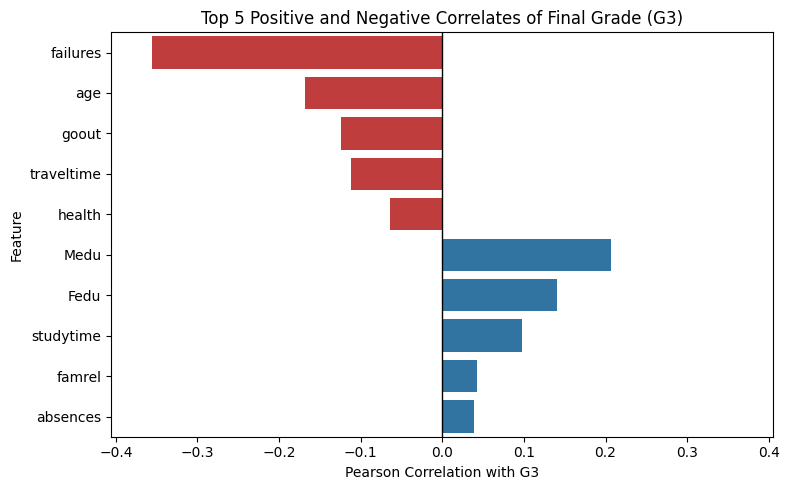

In [983]:
corr_g3 = cm["G3"].drop("G3")

top_pos = corr_g3.sort_values(ascending=False).head(5)
top_neg = corr_g3.sort_values().head(5)

top10 = pd.concat([top_neg, top_pos])

plt.figure(figsize=(8, 5))

sns.barplot(
    x=top10.values,
    y=top10.index,
    hue=top10.index,
    palette=["#d62728" if v < 0 else "#1f77b4" for v in top10],
    legend=False
)

plt.axvline(0, color="black", linewidth=1)

lim = max(abs(top10.values))
plt.xlim(-lim - 0.05, lim + 0.05)

plt.xlabel("Pearson Correlation with G3")
plt.ylabel("Feature")
plt.title("Top 5 Positive and Negative Correlates of Final Grade (G3)")
plt.tight_layout()
plt.show()


#### Correlation Analysis for Categorical Features

In [984]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,absences_q
0,Gabriel Pereira,Female,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,high
1,Gabriel Pereira,Female,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,medium
2,Gabriel Pereira,Female,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,high
3,Gabriel Pereira,Female,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,low
4,Gabriel Pereira,Female,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,Mousinho da Silveira,Male,19,U,LE3,T,1,1,other,at_home,...,2,3,3,3,5,5,8,9,9,high
395,Mousinho da Silveira,Male,18,U,GT3,T,4,4,teacher,services,...,3,2,1,2,4,0,8,7,7,low
396,Mousinho da Silveira,Male,17,U,GT3,T,4,4,teacher,services,...,3,2,1,2,4,0,8,7,7,low
397,Mousinho da Silveira,Male,19,U,GT3,T,4,4,teacher,other,...,3,2,1,2,4,0,8,7,7,low


In [985]:
categorical_columns = (
    df
    .select_dtypes(include="object")
)
categorical_columns["G3"] = df["G3"]

In [986]:
encoded = pd.get_dummies(categorical_columns, drop_first=True)

cm = encoded.corr(method="pearson")
cm

,G3,school_Mousinho da Silveira,sex_Male,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
G3,1.000000,-0.063089,0.094771,0.101322,0.085759,-0.060352,0.118069,-0.090398,0.082497,0.038461,...,0.017249,-0.085277,-0.079626,-0.029432,0.108118,0.023528,0.064867,0.180186,0.112102,-0.124011
school_Mousinho da Silveira,-0.063089,1.000000,0.016141,-0.255109,0.045484,0.053299,-0.061295,0.021075,-0.067590,0.046610,...,-0.044556,0.055464,-0.144900,-0.191000,-0.040777,-0.139112,-0.135860,-0.017129,-0.183670,0.039557
sex_Male,0.094771,0.016141,1.000000,-0.022685,0.082500,0.026876,-0.022924,-0.005208,-0.003505,0.184478,...,-0.006523,-0.061296,-0.141450,-0.162723,-0.137500,0.088122,-0.028314,-0.147753,0.019902,-0.108635
address_U,0.101322,-0.255109,-0.022685,1.000000,0.068815,-0.040663,0.097400,-0.036700,0.065153,0.044620,...,-0.077503,0.023539,0.022596,0.016994,0.047594,-0.056450,0.048026,0.044018,0.199638,0.001449
famsize_LE3,0.085759,0.045484,0.082500,0.068815,1.000000,-0.151389,0.005677,-0.061345,0.045277,0.050317,...,0.022363,-0.023344,-0.026111,-0.103830,-0.007960,0.006341,0.112267,-0.007264,0.014586,0.038742
Pstatus_T,-0.060352,0.053299,0.026876,-0.040663,-0.151389,1.000000,0.014596,-0.026095,-0.064431,0.031235,...,-0.063354,-0.052021,-0.043494,0.014652,0.043090,0.093342,-0.095439,-0.039913,0.060917,-0.042736
Mjob_health,0.118069,-0.061295,-0.022924,0.097400,0.005677,0.014596,1.000000,-0.225628,-0.180039,-0.130910,...,-0.050735,-0.024022,-0.063069,0.098829,0.082518,0.015659,0.071101,0.070111,0.093578,0.033423
Mjob_other,-0.090398,0.021075,-0.005208,-0.036700,-0.061345,-0.026095,-0.225628,1.000000,-0.436086,-0.317089,...,-0.101135,0.032657,0.046754,-0.112892,-0.104918,-0.084206,-0.076349,0.001626,-0.031198,0.048511
Mjob_services,0.082497,-0.067590,-0.003505,0.065153,0.045277,-0.064431,-0.180039,-0.436086,1.000000,-0.253019,...,-0.018724,0.015590,0.048621,0.053093,0.014675,0.047110,0.041156,0.004276,0.091403,-0.037432
Mjob_teacher,0.038461,0.046610,0.184478,0.044620,0.050317,0.031235,-0.130910,-0.317089,-0.253019,1.000000,...,0.164532,-0.075712,-0.102042,0.033930,0.109428,0.079795,0.054203,0.066827,0.070523,-0.066331


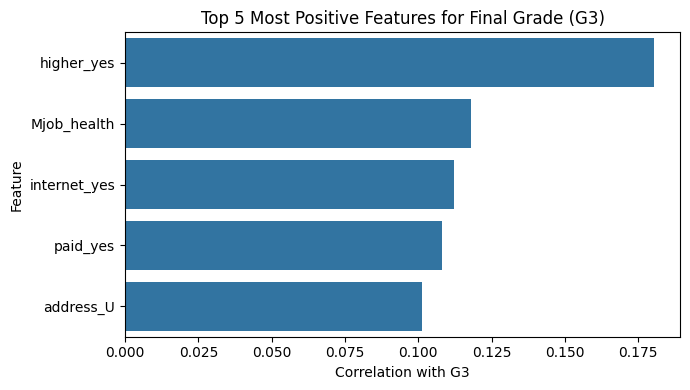

In [987]:
top5 = (
    cm["G3"]
    .drop("G3")
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(7, 4))

sns.barplot(
    x=top5.values,
    y=top5.index,
    orient="h"
)

plt.xlabel("Correlation with G3")
plt.ylabel("Feature")
plt.title("Top 5 Most Positive Features for Final Grade (G3)")
plt.tight_layout()
plt.show()

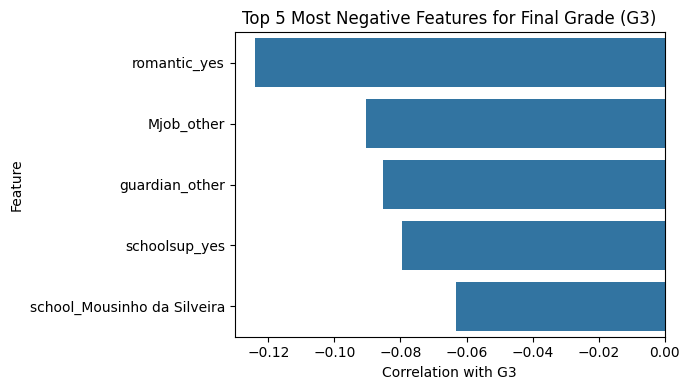

In [988]:
top5 = (
    cm["G3"]
    .drop("G3")
    .sort_values(ascending=True)
    .head(5)
)

plt.figure(figsize=(7, 4))

sns.barplot(
    x=top5.values,
    y=top5.index,
    orient="h"
)

plt.xlabel("Correlation with G3")
plt.ylabel("Feature")
plt.title("Top 5 Most Negative Features for Final Grade (G3)")
plt.tight_layout()
plt.show()

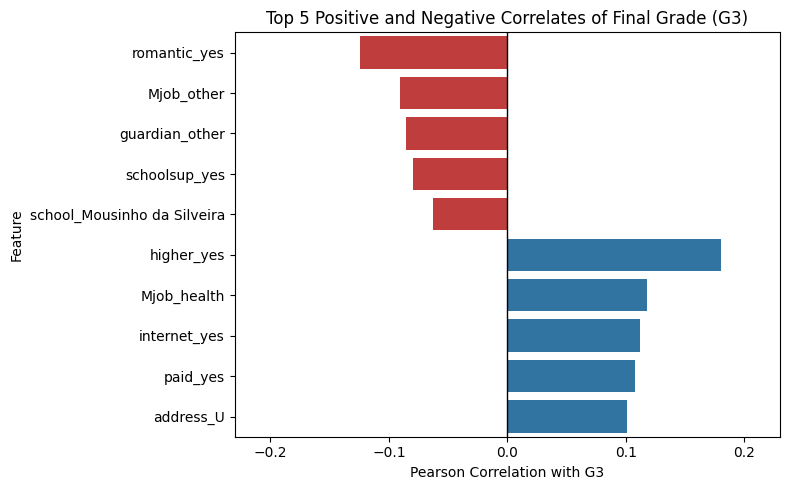

In [989]:
corr_g3 = cm["G3"].drop("G3")

top_pos = corr_g3.sort_values(ascending=False).head(5)
top_neg = corr_g3.sort_values().head(5)

top10 = pd.concat([top_neg, top_pos])

plt.figure(figsize=(8, 5))

sns.barplot(
    x=top10.values,
    y=top10.index,
    hue=top10.index,
    palette=["#d62728" if v < 0 else "#1f77b4" for v in top10],
    legend=False
)

plt.axvline(0, color="black", linewidth=1)

lim = max(abs(top10.values))
plt.xlim(-lim - 0.05, lim + 0.05)

plt.xlabel("Pearson Correlation with G3")
plt.ylabel("Feature")
plt.title("Top 5 Positive and Negative Correlates of Final Grade (G3)")
plt.tight_layout()
plt.show()
